## What is Gradient Descent?
Imagine you're blindfolded on a mountain and want to reach the bottom (lowest point). You:

    Feel the ground with your foot
    Take a step in the steepest downward direction
    Repeat until you reach the bottom

That's exactly what Gradient Descent does! It finds the best solution by taking small steps toward the optimal answer.

### Types of Gradient Descent 
1. Batch Gradient (Direct Solution)

Calculates the exact answer mathematically
Pros: Exact solution, no iterations needed
Cons: Slow with large datasets, doesn't work with all models

2. Stochastic Gradient Descent (SGD)

Uses ONE data point at a time
Pros: Fast, memory efficient, can escape local minima
Cons: Noisy, jumpy path

3. Mini-batch Gradient Descent

Uses SMALL BATCHES of data (e.g., 32 points)
Pros: Best of both worlds - speed and stability
Cons: Need to choose batch size

### Loading Data
Since in the last file, we used synthetic data, let us use Kaggle's California Housing Dataset this time

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

np.random.seed(42)

california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

feature_names = california_housing.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['MedHouseVal'] = y

print("Dataset shape: " ,df.shape)
print("Features in the dataset are: ")
for i, feature in enumerate(feature_names):
    print(f"{i+1}. {feature}")

print("\nDataset description:")
print("This dataset contains information about California housing from the 1990 census.")
print("Target: Median house value in hundreds of thousands of dollars")

print("\nFirst few rows:")
df.head()


Dataset shape:  (20640, 9)
Features in the dataset are: 
1. MedInc
2. HouseAge
3. AveRooms
4. AveBedrms
5. Population
6. AveOccup
7. Latitude
8. Longitude

Dataset description:
This dataset contains information about California housing from the 1990 census.
Target: Median house value in hundreds of thousands of dollars

First few rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Exploratory Data Analysis
In simple terms, check for missing values in training and testing data, and remove them

In [10]:
print("Dataset Information: ")
print(df.info())
print(df.describe())

Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154

In [11]:
print("Checking for missing values: ", df.isnull().sum().sum())


Checking for missing values:  0


For sake of simplicity, let us use 3 features:
1. MedInc
2. HouseAge
3. AveRooms

In [14]:
selected_features = ['MedInc', 'HouseAge', 'AveRooms']

# Split the data into training and testing

X_selected = df[selected_features]
y_selected = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")

# Convert to numpy arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

Training samples: 16512
Test samples: 4128
Features: 3


### Feature Scaling:
Feature scaling is a data preprocessing technique used to standardize the range of independent variables or features of data.

In [16]:
print("Original feature statistics:")
for i, feature in enumerate(selected_features):
    print(f"{feature}: Mean={X_train[:,i].mean():.2f}, Std={X_train[:,i].std():.2f}")

Original feature statistics:
MedInc: Mean=3.88, Std=1.90
HouseAge: Mean=28.61, Std=12.60
AveRooms: Mean=5.44, Std=2.39


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nAfter scaling - Feature statistics (should be mean~0, std~1):")
for i, feature in enumerate(selected_features):
    print(f"{feature}: Mean={X_train_scaled[:,i].mean():.2f}, Std={X_train_scaled[:,i].std():.2f}")



After scaling - Feature statistics (should be mean~0, std~1):
MedInc: Mean=-0.00, Std=1.00
HouseAge: Mean=-0.00, Std=1.00
AveRooms: Mean=-0.00, Std=1.00


In [18]:
# Add bias term (intercept) - a column of ones
X_train_final = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_final = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

print(f"\nFinal training data shape (with bias): {X_train_final.shape}")



Final training data shape (with bias): (16512, 4)


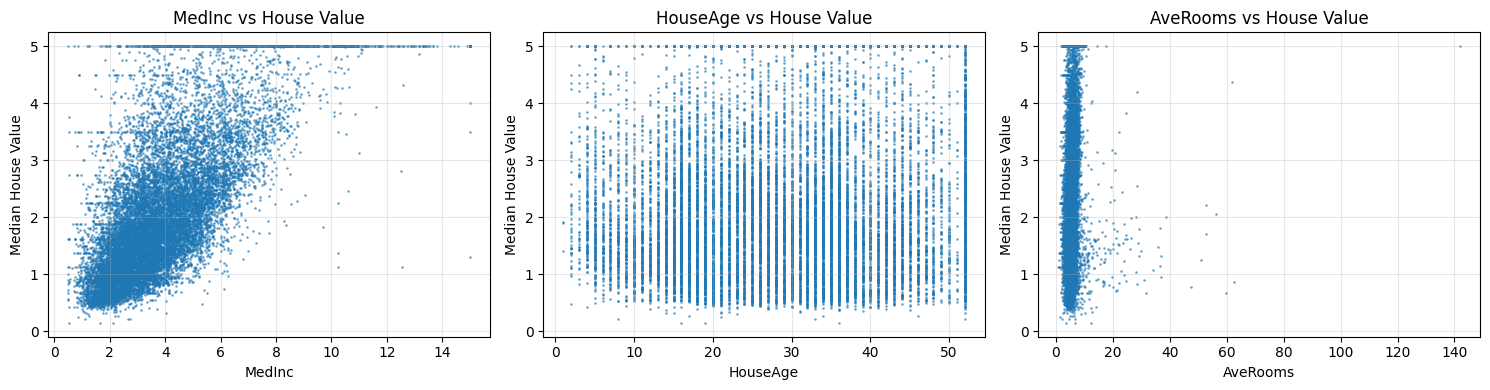

In [19]:
# Visualize the relationships
plt.figure(figsize=(15, 4))
for i, feature in enumerate(selected_features):
    plt.subplot(1, 3, i+1)
    plt.scatter(X_train[:, i], y_train, alpha=0.5, s=1)
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.title(f'{feature} vs House Value')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Our goal is now to minimize the loss function